### Differential operators

In [1]:
from ore_algebra import OreAlgebra

In [2]:
Pols.<z> = PolynomialRing(QQ)
DiffOps.<Dz> = OreAlgebra(Pols)

In [3]:
DiffOps

Univariate Ore algebra in Dz over Univariate Polynomial Ring in z over Rational Field

In [4]:
Dz(sin(z))

cos(z)

In [5]:
Dz*z

z*Dz + 1

In [6]:
RecOps.<Sz> = OreAlgebra(Pols)

In [7]:
Sz*z

(z + 1)*Sz

In [8]:
Sz(sin(z))

sin(z + 1)

### Toy Examples 1: Numerical Evaluation

In [9]:
(Dz - 1).numerical_solution(ini=[1], path=[0, 1], eps=1e-10) # variants...

[2.7182818285 +/- 4.37e-11]

⤷ Note that the output is an interval!<br/><br/>

In [10]:
my_interval = _
my_interval

[2.7182818285 +/- 4.37e-11]

In [11]:
(Dz - 1).numerical_solution(ini=[my_interval/3], path=[0, my_interval])

[13.731185225 +/- 2.46e-10]

In [12]:
dop = Dz^2 - z  # Airy Ai
ini = [1/3*3^(1/3)/gamma(2/3), -1/2*3^(1/6)*gamma(2/3)/pi]
dop.numerical_solution(ini, [0, -100])

[0.17675339323955288 +/- 4.56e-18]

### Toy Examples 2: Paths

In [13]:
dop = Dz*z*Dz
dop(log(z))

0

In [14]:
dop.numerical_solution(ini=[0, 1], path=[1, 2])

[0.69314718055994531 +/- 1.23e-18]

In [15]:
#dop.numerical_solution(ini=[0, 1], path=[1, -1])

In [16]:
dop.numerical_solution(ini=[0, 1], path=[1, i, -1])

[+/- 6.62e-28] + [3.1415926535897932 +/- 3.88e-17]*I

In [17]:
dop.numerical_solution(ini=[0, 1], path=[1, -i, -1])

[+/- 6.62e-28] + [-3.1415926535897932 +/- 3.88e-17]*I

### Local monodromy matrices

In [18]:
a, b, c = 1/2, 1/3, 1   # ₂F₁(a,b;c;z)
dop = z*(1-z)*Dz^2 + (c - (a + b + 1)*z)*Dz - a*b
dop

(-z^2 + z)*Dz^2 + (-11/6*z + 1)*Dz - 1/6

In [19]:
dop.leading_coefficient().factor()

(-1) * (z - 1) * z

In [20]:
dop.numerical_transition_matrix([1/2, i/2, -1/2, -i/2, 1/2], 1e-5)

[[1.00000 +/- 8.31e-8] + [-0.646840 +/- 3.98e-7]*I           [+/- 1.37e-7] + [2.19209 +/- 1.97e-6]*I]
[        [+/- 1.10e-7] + [-0.190869 +/- 4.45e-7]*I  [1.00000 +/- 2.38e-7] + [0.646840 +/- 5.60e-7]*I]

In [21]:
dop.numerical_transition_matrix([1/2, 1-i/2, 3/2, 1+i/2,1/2], 1e-5)

[ [1.38287 +/- 2.35e-6] + [-0.663154 +/- 3.06e-7]*I   [1.03532 +/- 3.33e-6] + [-1.79323 +/- 2.53e-6]*I]
[[-0.326494 +/- 5.88e-7] + [0.565505 +/- 1.43e-7]*I   [0.117128 +/- 4.56e-7] + [1.52918 +/- 5.37e-7]*I]

### Local monodromy by singular connection

Local monodromy = formal monodromy + singular connection

In [22]:
a, b, c = 1/2, 1/3, 1   # ₂F₁(a,b;c;z)
dop = z*(1-z)*Dz^2 + (c - (a + b + 1)*z)*Dz - a*b

In [23]:
dop.numerical_transition_matrix([1/2, I/2, -1/2, -I/2, 1/2], 1e-5)

[[1.00000 +/- 8.31e-8] + [-0.646840 +/- 3.98e-7]*I           [+/- 1.37e-7] + [2.19209 +/- 1.97e-6]*I]
[        [+/- 1.10e-7] + [-0.190869 +/- 4.45e-7]*I  [1.00000 +/- 2.38e-7] + [0.646840 +/- 5.60e-7]*I]

In [24]:
dop.local_basis_expansions(0, 4)

[log(z) + 1/6*z*log(z) + 1/2*z + 1/12*z^2*log(z) + 41/144*z^2 + 35/648*z^3*log(z) + 167/864*z^3,
 1 + 1/6*z + 1/12*z^2 + 35/648*z^3]

In [25]:
mat = dop.numerical_transition_matrix([0, 1/2], 1e-7)
mon = matrix([[1, 0], [CBF(2*pi*I), 1]])
mat*mon*~mat

[[1.000000 +/- 2.58e-8] + [-0.6468403 +/- 4.39e-8]*I           [+/- 7.44e-9] + [2.1920882 +/- 7.55e-8]*I]
[        [+/- 1.81e-8] + [-0.19086933 +/- 8.92e-9]*I  [1.000000 +/- 3.44e-8] + [0.6468403 +/- 4.17e-8]*I]

### Pólya walks in dimension 15

(Thanks to B. Salvy)

In [26]:
from ore_algebra.examples import polya
dim = 15
polya.dop[dim]

(269276305858560000*z^30 - 80950584950784000*z^28 + 3629735201193984*z^26 - 57080630763520*z^24 + 409981265408*z^22 - 1499829760*z^20 + 2871232*z^18 - 2720*z^16 + z^14)*Dz^15 + (60587168818176000000*z^29 - 16999622839664640000*z^27 + 707798364232826880*z^25 - 10274513537433600*z^23 + 67646908792320*z^21 - 224974464000*z^19 + 387616320*z^17 - 326400*z^15 + 105*z^13)*Dz^14 + (5937542544181248000000*z^28 - 1551046657578762240000*z^26 + 59789931630571929600*z^24 - 798278106947641344*z^22 + 4796169345443840*z^20 - 14416495588352*z^18 + 22181540160*z^16 - 16423904*z^14 + 4550*z^12)*Dz^13 + (334481563322210304000000*z^27 - 81131900756901396480000*z^25 + 2886264219850496409600*z^23 - 35303727569401454592*z^21 + 192591205900620800*z^19 - 519787439069184*z^17 + 707833651200*z^15 - 454991264*z^13 + 106470*z^11)*Dz^12 + (12041336279599570944000000*z^26 - 2704250458682470563840000*z^24 + 88474218684064461619200*z^22 - 987113006841956179968*z^20 + 4862067116732345856*z^18 - 11694546001056256*z^16 + 

In [27]:
polya.dop[dim].leading_coefficient()(0)

0

In [28]:
polya.dop[dim].local_basis_monomials(0)

[1/87178291200*log(z)^14,
 1/6227020800*log(z)^13,
 1/479001600*log(z)^12,
 1/39916800*log(z)^11,
 1/3628800*log(z)^10,
 1/362880*log(z)^9,
 1/40320*log(z)^8,
 1/5040*log(z)^7,
 1/720*log(z)^6,
 1/120*log(z)^5,
 1/24*log(z)^4,
 1/6*log(z)^3,
 1/2*log(z)^2,
 log(z),
 1]

In [29]:
ini = [0]*(dim - 1) + [1]
v = polya.dop[dim].numerical_solution(ini, [0,1/(2*dim)], 1e-60)
(v - 1)/v

[0.03586962312535651422940427078451975465049 +/- 2.68e-42]

(The evaluation point is singular, but the solution has a finite limit.)

### Face-centered cubic lattices
[Guttmann 2009, Broadhurst 2009, Koutschan 2013]

In [30]:
from ore_algebra.examples import fcc
fcc.dop6

(27122036833024*z^43 + 8208413201024064*z^42 + 1028987679702510976*z^41 + 75518451137118783792*z^40 + 3743195619381989907184*z^39 + 135369638077546936261428*z^38 + 3745615314367420203992832*z^37 + 81811619367860049045984675*z^36 + 1440466637248203913774334250*z^35 + 20724331113040275023719172850*z^34 + 245446627541652046097792768214*z^33 + 2395828801191215780780578117794*z^32 + 19147407470673111231862249418166*z^31 + 122863963621496746370188659696702*z^30 + 602621255648485924378700672331054*z^29 + 1935192664301617476137337671088360*z^28 + 694152712036783264243644290673234*z^27 - 39030042885818935455901289133872622*z^26 - 297645962803933196564873733670191774*z^25 - 1329742929728007215704002549281591538*z^24 - 3903989614825648819224432657208727646*z^23 - 6038015534019664017777438417359311914*z^22 + 7565280951156009750992823479550694170*z^21 + 83328126336960183101771239549883786325*z^20 + 297859836972471180382017327162905955900*z^19 + 681226694393685252017130073908325840500*z^18 + 1055504

In [31]:
fcc.dop6.numerical_solution([0, 0, 0, 0, 0, 1, 0, 0], [0, 1], 1e-60, assume_analytic=True)

[1.02774910062749883985936367927396850209243990900114872425172166 +/- 4.37e-63] + [+/- 5.14e-73]*I

### Iterated integrals
After J. Ablinger, J. Blümlein, C. G. Raab, and C. Schneider,
*[Iterated Binomial Sums and their Associated Iterated Integrals](http://arxiv.org/pdf/1407.1822)*,
Journal of Mathematical Physics 55(11), 2014.

$$\int_{0}^1 dx_1 \, w_1(x_1) \int_{x_1}^1 dx_2 \, w_2(x_2) \, \cdots \! \int_{x_{n-1}}^1 dx_n \, w_n(x_n)$$

In [32]:
from ore_algebra.examples import iint
i = 69; iint.word[i]

[x/(x - 1), 2/(sqrt(4*x - 1)*x), 2/(sqrt(4*x - 1)*x), -1/(x - 1), -1/(x - 1)]

In [33]:
dop = iint.diffop(iint.word[i])
dop

(x^9 - 13/4*x^8 + 15/4*x^7 - 7/4*x^6 + 1/4*x^5)*Dx^6 + (27/2*x^8 - 35*x^7 + 30*x^6 - 9*x^5 + 1/2*x^4)*Dx^5 + (101/2*x^7 - 397/4*x^6 + 57*x^5 - 17/2*x^4 + 1/4*x^3)*Dx^4 + (111/2*x^6 - 303/4*x^5 + 45/2*x^4 + 3/4*x^3 - 3/4*x^2)*Dx^3 + (12*x^5 - 37/4*x^4 + 1/4*x^3 - 3/2*x^2 + 3/2*x)*Dx^2 + (-1/4*x^2 + 3/2*x - 3/2)*Dx

In [34]:
iint.ini[i]

[0, 0, 0, -1/3, 1/3*I*pi + 2/3, -2/3*I*pi + 1/6*pi^2 - 11/12]

In [35]:
roots = dop.leading_coefficient().roots(AA, multiplicities=False)
sing = list(reversed(sorted([s for s in roots if 0 < s < 1])))
sing

[0.25000000000000000?]

In [36]:
from ore_algebra.analytic.path import Point
path = [1] + [Point(s, dop, outgoing_branch=(0,-1)) for s in sing] + [0]
dop.numerical_solution(iint.ini[i], path, 1e-100)

[-0.97080469562493124056011987537954344846933233520382808407829772093922068543247104239693854364491332570 +/- 9.81e-102] + [+/- 2.77e-102]*I

### Volumes of semi-algebraic sets

In [37]:
import volume
with open("torus.data") as f:
    vol = volume.doit(f, 100)
vol

· PF eq order = 3
· interval: [-3, -1]
·· slice #1: ρ = -2971/1024
··· PF eq order = 2
··· interval: [-0.7629341015437308?, 0.7629341015437308?]
···· slice #1: ρ = -333/512
····· slice length = [0.458464611594969357299489644474 +/- 7.93e-31]
···· slice #2: ρ = -3/16
····· slice length = [0.84045215889193560180330863340 +/- 3.84e-30]
···· integrating PF equation over [-0.7629341015437308?, 0.7629341015437308?]...
···· ...piece volume = [1.042502360545567477912266674 +/- 6.60e-28] 
··· slice volume = [1.042502360545567477912266674 +/- 6.60e-28]
·· slice #2: ρ = -1609/1024
··· PF eq order = 2
··· interval: [-2.555592041400167?, 2.555592041400167?]
···· slice #1: ρ = -813/512
····· slice length = [1.94451736178767524728375194202 +/- 3.84e-30]
···· slice #2: ρ = 1841/1024
····· slice length = [1.84355214687635799781072006275 +/- 4.16e-30]
···· integrating PF equation over [-2.555592041400167?, 2.555592041400167?]...
···· ...piece volume = [8.9321241233688167691817030 +/- 8.10e-26] 
··· slic

···· slice #2: ρ = 631/1024
····· slice length = 0
···· integrating PF equation over [-0.6254385363342537?, 0.6254385363342537?]...
···· ...piece volume = 0 
··· interval: [0.6254385363342537?, 2.896752209411764?]
···· slice #1: ρ = 859/1024
····· slice length = [1.03941172948742980836593367454 +/- 4.30e-30]
···· slice #2: ρ = 1149/512
····· slice length = [1.85330459474314893076143365725 +/- 6.81e-30]
···· integrating PF equation over [0.6254385363342537?, 2.896752209411764?]...
···· ...piece volume = [3.51682354126377608771849909 +/- 7.88e-27] 
··· slice volume = [7.0336470825275521754369982 +/- 2.35e-26]
·· integrating PF equation over [0, 1]...
·· ...piece volume = [6.7071348852051242655023929 +/- 6.65e-26] 
· interval: [1, 3]
·· slice #1: ρ = 1371/1024
··· PF eq order = 2
··· interval: [-2.684666581576908?, 2.684666581576908?]
···· slice #1: ρ = -3001/2048
····· slice length = [1.99977148445789850522530524014 +/- 4.53e-30]
···· slice #2: ρ = 65/2048
····· slice length = [1.5012003

[39.47841760435743447533796 +/- 6.02e-24]

# Bonus Examples

### Asymptotics of Apéry Numbers

In [38]:
dop = (z^2*(z^2-34*z+1)*Dz^4 + 5*z*(2*z^2-51*z+1)*Dz^3 + (25*z^2-418*z+4)*Dz^2 + (15*z-117)*Dz + 1)
sing = dop.leading_coefficient().roots(AA, multiplicities=False); sing

[0, 0.02943725152285942?, 33.97056274847714?]

In [39]:
dop.local_basis_monomials(0)

[1/2*log(z)^2, log(z), 1, z]

⤷ Solutions $y = y_0 + y_1 z + \dots$ analytic at 0 are characterized by $y_0, y_1$

In [40]:
dop.local_basis_monomials(sing[1]) # sing[1] = α⁻¹ ≈ 0.029

[1,
 sqrt(z - 0.02943725152285942?),
 z - 0.02943725152285942?,
 (z - 0.02943725152285942?)^2]

⤷ A hyperplane of analytic solutions. Does $a(z)$ lie on it?

In [41]:
mat = dop.numerical_transition_matrix([0, sing[1]])

In [42]:
a0 = 1; a1 = 5
c1 = a0*mat[1,2] + a1*mat[1,3]
c1

[4.5463762475228446 +/- 7.72e-17]*I

⤷ Thus $a(z) \sim 4.54\dots \sqrt{z - \alpha^{-1}}$.
What about $b(z)$?

In [43]:
b0 = 0; b1 = 6
d1 = b0*mat[1,2] + b1*mat[1,3]
d1/c1

[1.2020569031595943 +/- 5.17e-17]

In [44]:
zeta(3.)

1.20205690315959

### Compacted binary trees of bounded right height
After A. Genitrini, B. Gittenberger, M. Kauers, M. Wallner, *[Asymptotic Enumeration of Compacted Binary Trees](https://arxiv.org/abs/1703.10031)*, 2017

Exponential generating function of compacted binary trees:

In [45]:
from ore_algebra.examples import cbt
QQ[['z']](cbt.egf)

1 + z + 3/2*z^2 + 5/2*z^3 + 37/8*z^4 + 373/40*z^5 + 4829/240*z^6 + 76981/1680*z^7 + 293057/2688*z^8 + 32536277/120960*z^9 + 827662693/1209600*z^10

Annihilator of EGF of CBT of right height ≤ 5:

In [46]:
dop = cbt.dop[5]; dop

(-4*z^3 + 10*z^2 - 6*z + 1)*Dz^6 + (9*z^3 - 58*z^2 + 75*z - 21)*Dz^5 + (-6*z^3 + 78*z^2 - 184*z + 95)*Dz^4 + (z^3 - 33*z^2 + 141*z - 110)*Dz^3 + (3*z^2 - 32*z + 40)*Dz^2 + (z - 3)*Dz

Singular points:

In [47]:
sing = dop.leading_coefficient().roots(QQbar, multiplicities=False)
sing

[0.2928932188134525?, 0.50000000000000000?, 1.707106781186548?]

In [48]:
1/(4*(cos(pi/8)^2)).n()

0.292893218813452

Local behaviors at the dominant singularity:

In [49]:
s = sing[0]
dop.local_basis_monomials(s)

[1,
 z - 0.2928932188134525?,
 (z - 0.2928932188134525?)^1.771446609406727?,
 (z - 0.2928932188134525?)^2,
 (z - 0.2928932188134525?)^3,
 (z - 0.2928932188134525?)^4]

Singularity analysis implies

$$\#\{\text{cbt of rh ≤ 5}\} \sim \kappa_5 \, n! α^n n^β, \qquad α = 4 \cos²(\pi/8), \quad β=-(α+5)/8$$


In [50]:
dop.local_basis_monomials(0)

[1, z, z^2, z^3, z^4, z^5]

In [51]:
ini = list(cbt.egf[:6])
# 2 = index of the singular element of the local basis
c = (dop.numerical_transition_matrix([0,s])*vector(ini))[2]
c

[31.42732179257817 +/- 3.99e-15] + [27.45408401646515 +/- 4.94e-15]*I

In [52]:
expo = dop.local_basis_monomials(s)[2].op[1]
(CBF(-s)^expo*c/CBF(-expo).gamma()).real()

[1.6248570260793 +/- 3.26e-14]

### A conjecture of M. Kontsevich
(via D. van Straten and A. Bostan)

* $L = D_x\,x\,(x-1)\,(x-t)\,D_x + x$ for $t > 0$ (small)
* $M(t)$ = transition matrix along a simple loop around $\{0, t\}$
* $λ(t), \barλ(t)$ = eigenvalues of $M(t)$

Then

$$t \mapsto \left(\frac{\log(λ(t))}{2πi}\right)^2$$

is analytic at $0$, and its Taylor coefficients are rationals with small denominators.

**Task:** Compute that series (heuristically!)

In [53]:
terms = 20
sz = ceil((terms + 1)^2 * sqrt(ZZ(terms + 1).nbits())/2)
prec = terms*(sz + 4)
hprec = prec + 100
C = ComplexField(hprec)
sz, prec

(494, 9960)

In [54]:
Pol.<x> = QQ[]
Dop.<Dx> = OreAlgebra(Pol)
t0 = 2^(-sz)
L = Dx * (x*(x-1)*(x-t0)) * Dx + x
L

(x^3 - 51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243585/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584*x^2 + 1/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584*x)*Dx^2 + (3*x^2 - 51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243585/25573364124188608359478044506465618376692515984711443667838213813251045284411519960025547596296126227741302219746563054759509816764729633229129121792*x + 1/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584)*Dx + x

In [55]:
m1 = L.numerical_transition_matrix([0, t0/2], 2^(-prec)).change_ring(C)
m2 = L.numerical_transition_matrix([t0, t0/2], 2^(-prec)).change_ring(C)
delta = matrix(C, [[1, 0], [2*pi*I, 1]])
mat = m1*delta*~m1*m2*delta*~m2

In [56]:
tr = mat.trace().real()
Pol.<la> = C[]
char = (la+1/la-tr).numerator()
rt = char.roots(multiplicities=False)[0]
a = (rt.log()/C(2*I*pi))^2
a

9.55661945347296132085851693797188781687901641084629017212635483951070116839194249681346894948230248816225269688652024447196659221866529172317717316819939213240627697378970534007369094793255391012479623157991608485642114119536739895492450411146235843895786410142393040726033197617672506539514083442142442759090812879940981758433662239167340724319810893926196526509047862396795922421237322362090971892007688450432549351295709323129079332600914902436839736208060877381726134491404594103721557358992946626195251484424639965118570094637489866751690239072536410315443216987554285984761493365991170107672953780800331882524964802256087155600459907328695817442434944636178973498329690048754055080309136604508297423998126292626161918118956810728721517388055703986081566876667309926689308711058854784189848765066364404398023651948568675976101168160024542150112135301815234893157876824525825478010776097326356377528186366301207335272291722324601758423530852268824651073299389078588624925072593779354994388125503

In [57]:
coeffs = []; den_ratios = []; cur = a
for k in range(terms):
    rat = QQ(pari.bestappr(cur, 2^(sz/2+10)))
    cur = (cur - rat)/t0
    if k >= 2:
        den_ratios.append(rat.denom()/coeffs[-1].denom())
    coeffs.append(rat)
coeffs

[0,
 0,
 1/4,
 1/24,
 101/576,
 239/17280,
 19153/115200,
 -1516283/72576000,
 23167560743/121927680000,
 -5350452180523/76814438400000,
 8122785754979827/32262064128000000,
 -10922037427834714189/74525368135680000000,
 257615133666208067057417/688614401573683200000000,
 -5719273111411836892974100997/20679090479257706496000000000,
 749577901737131766662423170141529/1241986174184217852149760000000000,
 -56589264915861458106843233145366159317/111890534432256186300171878400000000000,
 166060654964554378941594941573970938041843381/161283491952031357180519752400896000000000000,
 -227464761949125949651795174312351837947239351830471/247010506429294584462681416394544250880000000000000,
 1379581218345710272912991297578804281398062616806207006247/756608001823315069884260939301472713100492800000000000000,
 -37154931571287997286276581805653700634917295203190508379056930613/22016589207616772850617000970999305581601157021696000000000000000]

In [58]:
den_ratios

[4,
 6,
 24,
 30,
 20/3,
 630,
 1680,
 630,
 420,
 2310,
 9240,
 30030,
 60060,
 90090,
 1441440,
 1531530,
 3063060,
 29099070]

### Plots

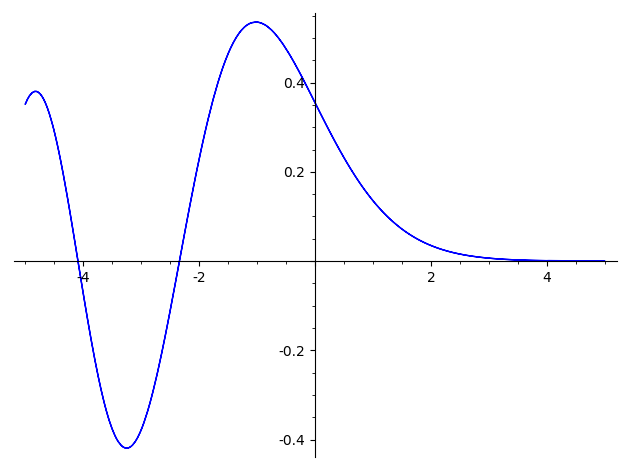

In [59]:
from ore_algebra.analytic.function import DFiniteFunction
P.<x> = QQ[]
A.<Dx> = OreAlgebra(P)
f = DFiniteFunction(Dx^2 - x,
        [1/(gamma(2/3)*3^(2/3)), -1/(gamma(1/3)*3^(1/3))],
        name='my_Ai')
f.plot((-5,5))